# HW1014Q2 CH03Q14

### 14. This problem focuses on the collinearity problem.

##### (a) Perform the following commands in Python:  rng = np.random.default_rng(10)  
x1 = rng.uniform(0, 1, size=100)  
x2 = 0.5 * x1 + rng.normal(size=100) / 10  
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)    
The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coeffcients?


In [1]:
import numpy as np

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

print("True regression coefficients: β0=2, β1=2, β2=0.3")

True regression coefficients: β0=2, β1=2, β2=0.3


##### (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

Correlation between x1 and x2: 0.772324497691354


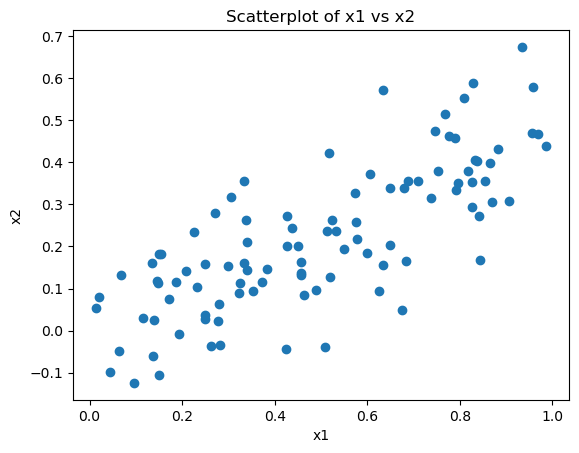

In [2]:
import matplotlib.pyplot as plt

correlation = np.corrcoef(x1, x2)[0, 1]
print(f"Correlation between x1 and x2: {correlation}")

plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatterplot of x1 vs x2')
plt.show()

##### (c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [3]:
import statsmodels.api as sm

X = np.column_stack((x1, x2))
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())
print("\nβˆ0, βˆ1, βˆ2=", model.params)
print("These estimates should be close to the true β0, β1, and β2")
print("We can reject the null hypothesis H0 : β1 = 0")
print("We cannot reject the null hypothesis H0 : β2 = 0")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        00:30:40   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

##### (d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [4]:
X_x1 = sm.add_constant(x1)
model_x1 = sm.OLS(y, X_x1).fit()
print(model_x1.summary())
print("\nWe can reject the null hypothesis H0 : β1 = 0")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        00:30:40   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

##### (e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [5]:
X_x2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X_x2).fit()
print(model_x2.summary())
print("\nWe cannot reject the null hypothesis H0 : β1 = 0")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        00:30:40   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

##### (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

In [6]:
print("Yes. Because β1 and β2 exist collinearity, so results obtained in (c)–(e) contradict each other.")

Yes. Because β1 and β2 exist collinearity, so results obtained in (c)–(e) contradict each other.


##### (g) Now fit a polynomial regression model that predicts y using x and x^2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [7]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

X_new = np.column_stack((x1, x2))
X_new = sm.add_constant(X_new)
model_new = sm.OLS(y, X_new).fit()
print("Model with x1 and x2 (with outlier):")
print(model_new.summary())

X_x1_new = sm.add_constant(x1)
model_x1_new = sm.OLS(y, X_x1_new).fit()
print("Model with x1 only (with outlier):")
print(model_x1_new.summary())

X_x2_new = sm.add_constant(x2)
model_x2_new = sm.OLS(y, X_x2_new).fit()
print("Model with x2 only (with outlier):")
print(model_x2_new.summary())

print("\nI think is not. Parameters in every model looks so different from others.")

Model with x1 and x2 (with outlier):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           4.60e-08
Time:                        00:30:40   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          